# **GROUP 34**

Vishwajeet Ekal

Aaron Fernandes

Vaishnavi Rai

Shreya Parab

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!pip install opencv-python
!pip install tabulate

In [ ]:
# folder_path = '/content/360 Rocks.zip'
# os.chdir(folder_path)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os

In [ ]:
images = []
folder_path = '/content/drive/MyDrive/360 Rocks'
os.chdir(folder_path)

for file_name in os.listdir():
    if file_name.endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(folder_path, file_name)
        rgb_image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
        images.append(gray_image)

In [ ]:
np_images = np.array(images)

In [ ]:
np_images.shape

(360, 800, 800)

# **Question 1**

**Apply PCA to the images from folder '360 Rocks'. How many components do you need to preserve 95% of the variance?**

In [ ]:
rockImages = deepcopy(np_images)

In [ ]:
images_flattened = rockImages.reshape(rockImages.shape[0], -1)

In [ ]:
images_flattened.shape

(360, 640000)

In [ ]:
scaler = StandardScaler()
images_standardized = scaler.fit_transform(images_flattened)

In [ ]:
pca = PCA(0.95)
images_pca = pca.fit_transform(images_standardized)

In [ ]:

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

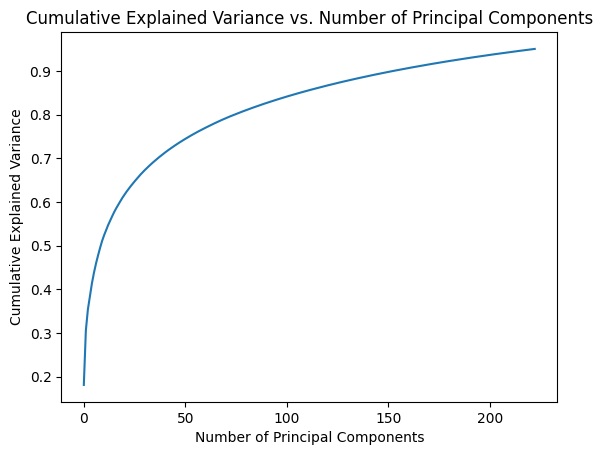

In [ ]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the Cumulative Explained Variance
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

In [ ]:
cumulative_explained_variance

array([0.18090351, 0.30556954, 0.35376907, 0.38448435, 0.4138637 ,
       0.43806109, 0.45908317, 0.47743263, 0.49472879, 0.5106367 ,
       0.52389571, 0.53575257, 0.54736129, 0.55764199, 0.56761519,
       0.57724236, 0.58596789, 0.59403805, 0.60179225, 0.60953081,
       0.61657168, 0.62322548, 0.62957968, 0.63558569, 0.64148421,
       0.64704244, 0.65253428, 0.65787231, 0.66315137, 0.66806883,
       0.67283016, 0.67738676, 0.68177416, 0.68609672, 0.69031037,
       0.69436863, 0.69834243, 0.70216746, 0.70590818, 0.70957229,
       0.71319717, 0.71670747, 0.72005179, 0.72336299, 0.72657465,
       0.72972391, 0.73286479, 0.73586485, 0.73879975, 0.74167218,
       0.74449915, 0.74730169, 0.7500747 , 0.75273651, 0.75536931,
       0.75794661, 0.76046751, 0.76292804, 0.76535994, 0.76776003,
       0.77012381, 0.77245235, 0.77476341, 0.77702753, 0.77925324,
       0.78146717, 0.78365025, 0.7857839 , 0.78788798, 0.78994361,
       0.79195347, 0.79392419, 0.79585936, 0.79774008, 0.79960

In [ ]:
images_pca.shape

(360, 223)

In [ ]:
images_pca

array([[-224.20000127,  108.68742091, -143.5741499 , ...,   -5.36026992,
          11.35285561,  -25.3791812 ],
       [ 122.98142514, -376.23296064,  200.6368988 , ...,   14.69761891,
          -6.17654086,  -14.89398981],
       [ 143.79371051, -174.50762002,  -26.20682058, ...,   27.50760317,
         -20.53175233,  -35.6205983 ],
       ...,
       [  68.83214158,   44.09440743, -128.57394262, ...,   17.87490746,
         -37.05455005,    7.34123938],
       [-375.98731719,  -93.98177414,  144.7876386 , ...,  -17.22097878,
          26.83525056,  -26.95490238],
       [  44.28464881, -393.23020427,  326.45898464, ...,   -1.28145707,
          -1.34935036,   -7.48043038]])

In [ ]:
np_images.shape

(360, 800, 800)

In [ ]:
num_components

223

*   Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. It aims to transform the original features of a dataset into a new set of uncorrelated features, called principal components, while retaining as much of the variance in the data as possible.
*   In a dataset, each feature contributes to the overall variance. High variance indicates that the values of the feature are spread out from the mean, while low variance suggests that the values are close to the mean.
*   By selecting a subset of the principal components, you can retain a certain percentage of the total variance in the data.
*   Here, 223 components are required to preserve 95% varicance. (This is because we have normalised the data before applying PCA. Otherwise it would be 227)

#**Question 2**

**Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 95% of variance using PCA**

In [ ]:
dataset_path = '/content/drive/MyDrive/360 Rocks'

In [ ]:
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

In [ ]:
num_images = 10
selected_images = []

for i in range(num_images):
    image_path = os.path.join(dataset_path, image_files[i])
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    selected_images.append(img)

In [ ]:
images_flattened = np.array([image.flatten() for image in selected_images])
scaler = StandardScaler()
images_standardized = scaler.fit_transform(images_flattened)

# Apply PCA
pca = PCA(n_components=0.95)
images_pca = pca.fit_transform(images_standardized)

# Reconstruct images
reconstructed_images = pca.inverse_transform(images_pca)

# Reshape reconstructed images to original shape
reconstructed_images = reconstructed_images.reshape(num_images, *selected_images[0].shape)

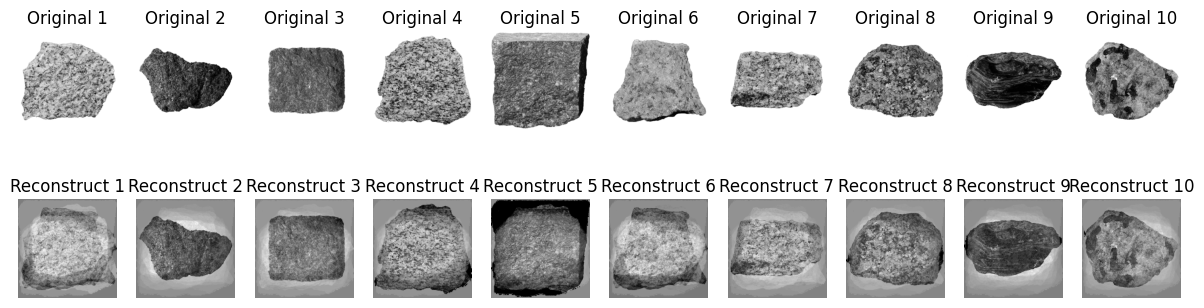

In [ ]:
fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
for i in range(num_images):
    axes[0, i].imshow(selected_images[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original {i+1}')
    axes[1, i].imshow(reconstructed_images[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Reconstruct {i+1}')

As you can see above is the plot of 10 original images and their reconstructions.

# **Question 3**

**Each of the images belongs to one of three rock categories. The category is indicated by the first letter in the filename (I, M and S). We will now try to see if the visualization can help us identify different clusters.**

**A. Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components?**

In [ ]:
images_pca.shape

(10, 8)

In [ ]:
images_flattened = np.array([image.flatten() for image in images])
scaler = StandardScaler()
images_standardized = scaler.fit_transform(images_flattened)

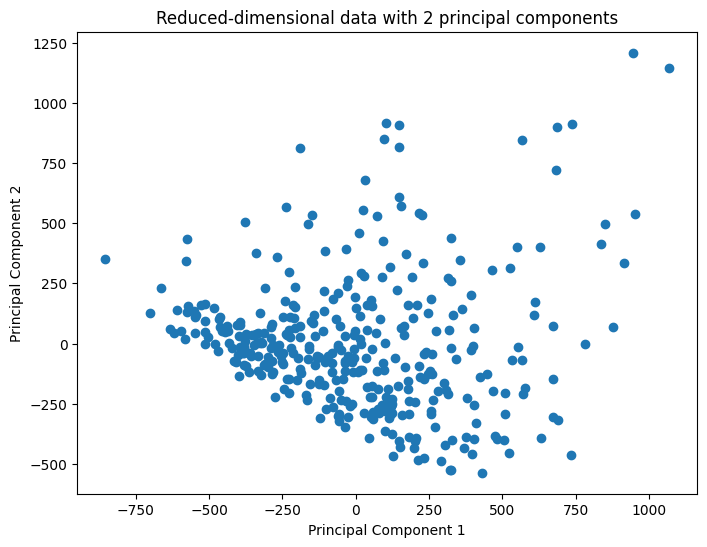

In [ ]:
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_standardized)

# Plot the reduced-dimensional data
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1])
plt.title('Reduced-dimensional data with 2 principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Print the explained variance ratio for the first two components
print(f"Explained variance ratio for the first two components: {pca.explained_variance_ratio_}")

Explained variance ratio for the first two components: [0.18090351 0.12466603]


Explained variance by the first component: 18.09%

Explained variance by the second component: 12.46%

In [ ]:
pca.explained_variance_ratio_.sum()

0.30556953515155605

Total explained variance by the first two components: 30.55%

**B. Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category (so you will have three different colors). Then add some rock images to the visualization to better understand what features in the images are accounting for the majority of variance in the data. Repeat the process and create the same type of plots for t-SNE, LLE and MDS.**

Based on the provided visualizations from PCA, LLE, t-SNE, and MDS algorithms, each plot offers a different perspective on the dataset:

**PCA (Principal Component Analysis)**: PCA tends to preserve global distances between points and is good at highlighting large-scale structure in the data. However, it may not always capture the local structure as effectively, which can be essential for classifying similar objects, like rock images.

**LLE (Locally Linear Embedding)**: LLE is more focused on preserving local distances, and therefore, it might be better at clustering local groups of data points. In your LLE plot, the categories seem to be slightly more clustered than in PCA, but there is still some overlap.

**t-SNE (t-Distributed Stochastic Neighbor Embedding)**: t-SNE is particularly good at preserving local structure and is known for its ability to separate clusters in a more distinct manner. The t-SNE plot shows separated clusters, but some overlap remains.

**MDS (Multidimensional Scaling)**: MDS aims to preserve the distance between points, similar to PCA, but it uses a slightly different approach. It is more focused on visualizing the similarity of individual cases in a dataset.

In [ ]:
# For PCA
pca = PCA(n_components=2, random_state=42)

In [ ]:
images_flattened = np.array([image.flatten() for image in images])
scaler = StandardScaler()
images_standardized = scaler.fit_transform(images_flattened)

In [ ]:
X_pca_reduced = pca.fit_transform(images_standardized)

In [ ]:
def resize_images(images, target_size):
  compressed_images = []
  for image in images:
      resized_img = cv2.resize(image, target_size)
      compressed_images.append(resized_img)

  return compressed_images


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [ ]:
def plot_rocks(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
  normalized_images = MinMaxScaler().fit_transform(X)
  neighbors = np.array([[10., 10.]])
  plt.figure(figsize=figsize)
  cmap = plt.cm.jet
  classes = [0,1,2]
  category_colors = {0: 'red', 1: 'green',2: 'blue'}
  category_names = {0: 'Igneous', 1: 'Metamorphic', 2: 'Sedimentary'}

  for cls in classes:
    plt.scatter(normalized_images[y == cls, 0], normalized_images[y == cls, 1], label=category_names[cls],
                    color = category_colors[cls], s=100, alpha=0.6)

  ax = plt.gca()  # get current axes
  for index, image_coord in enumerate(normalized_images):
    closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
    if closest_distance > min_distance:
          neighbors = np.r_[neighbors, [image_coord]]
          if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
          else:
              image = images[index].reshape(28, 28)
              imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                        image_coord)
              ax.add_artist(imagebox)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')

  plt.legend()
  plt.show()

In [ ]:
compressed_images = resize_images(images, (28,28))

In [ ]:
compressed_images = np.array(compressed_images)

In [ ]:
compressed_images.shape

(360, 28, 28)

In [ ]:
y = []
for filename in os.listdir():
  if filename.startswith('I'):
    y.append(0)

  elif filename.startswith('M'):
    y.append(1)

  elif filename.startswith('S'):
    y.append(2)

y = np.array(y)


# PCA

Following are plots for data after using PCA to reduce the dimensionality to 2. The plot has some images of corresponding category labels with it.

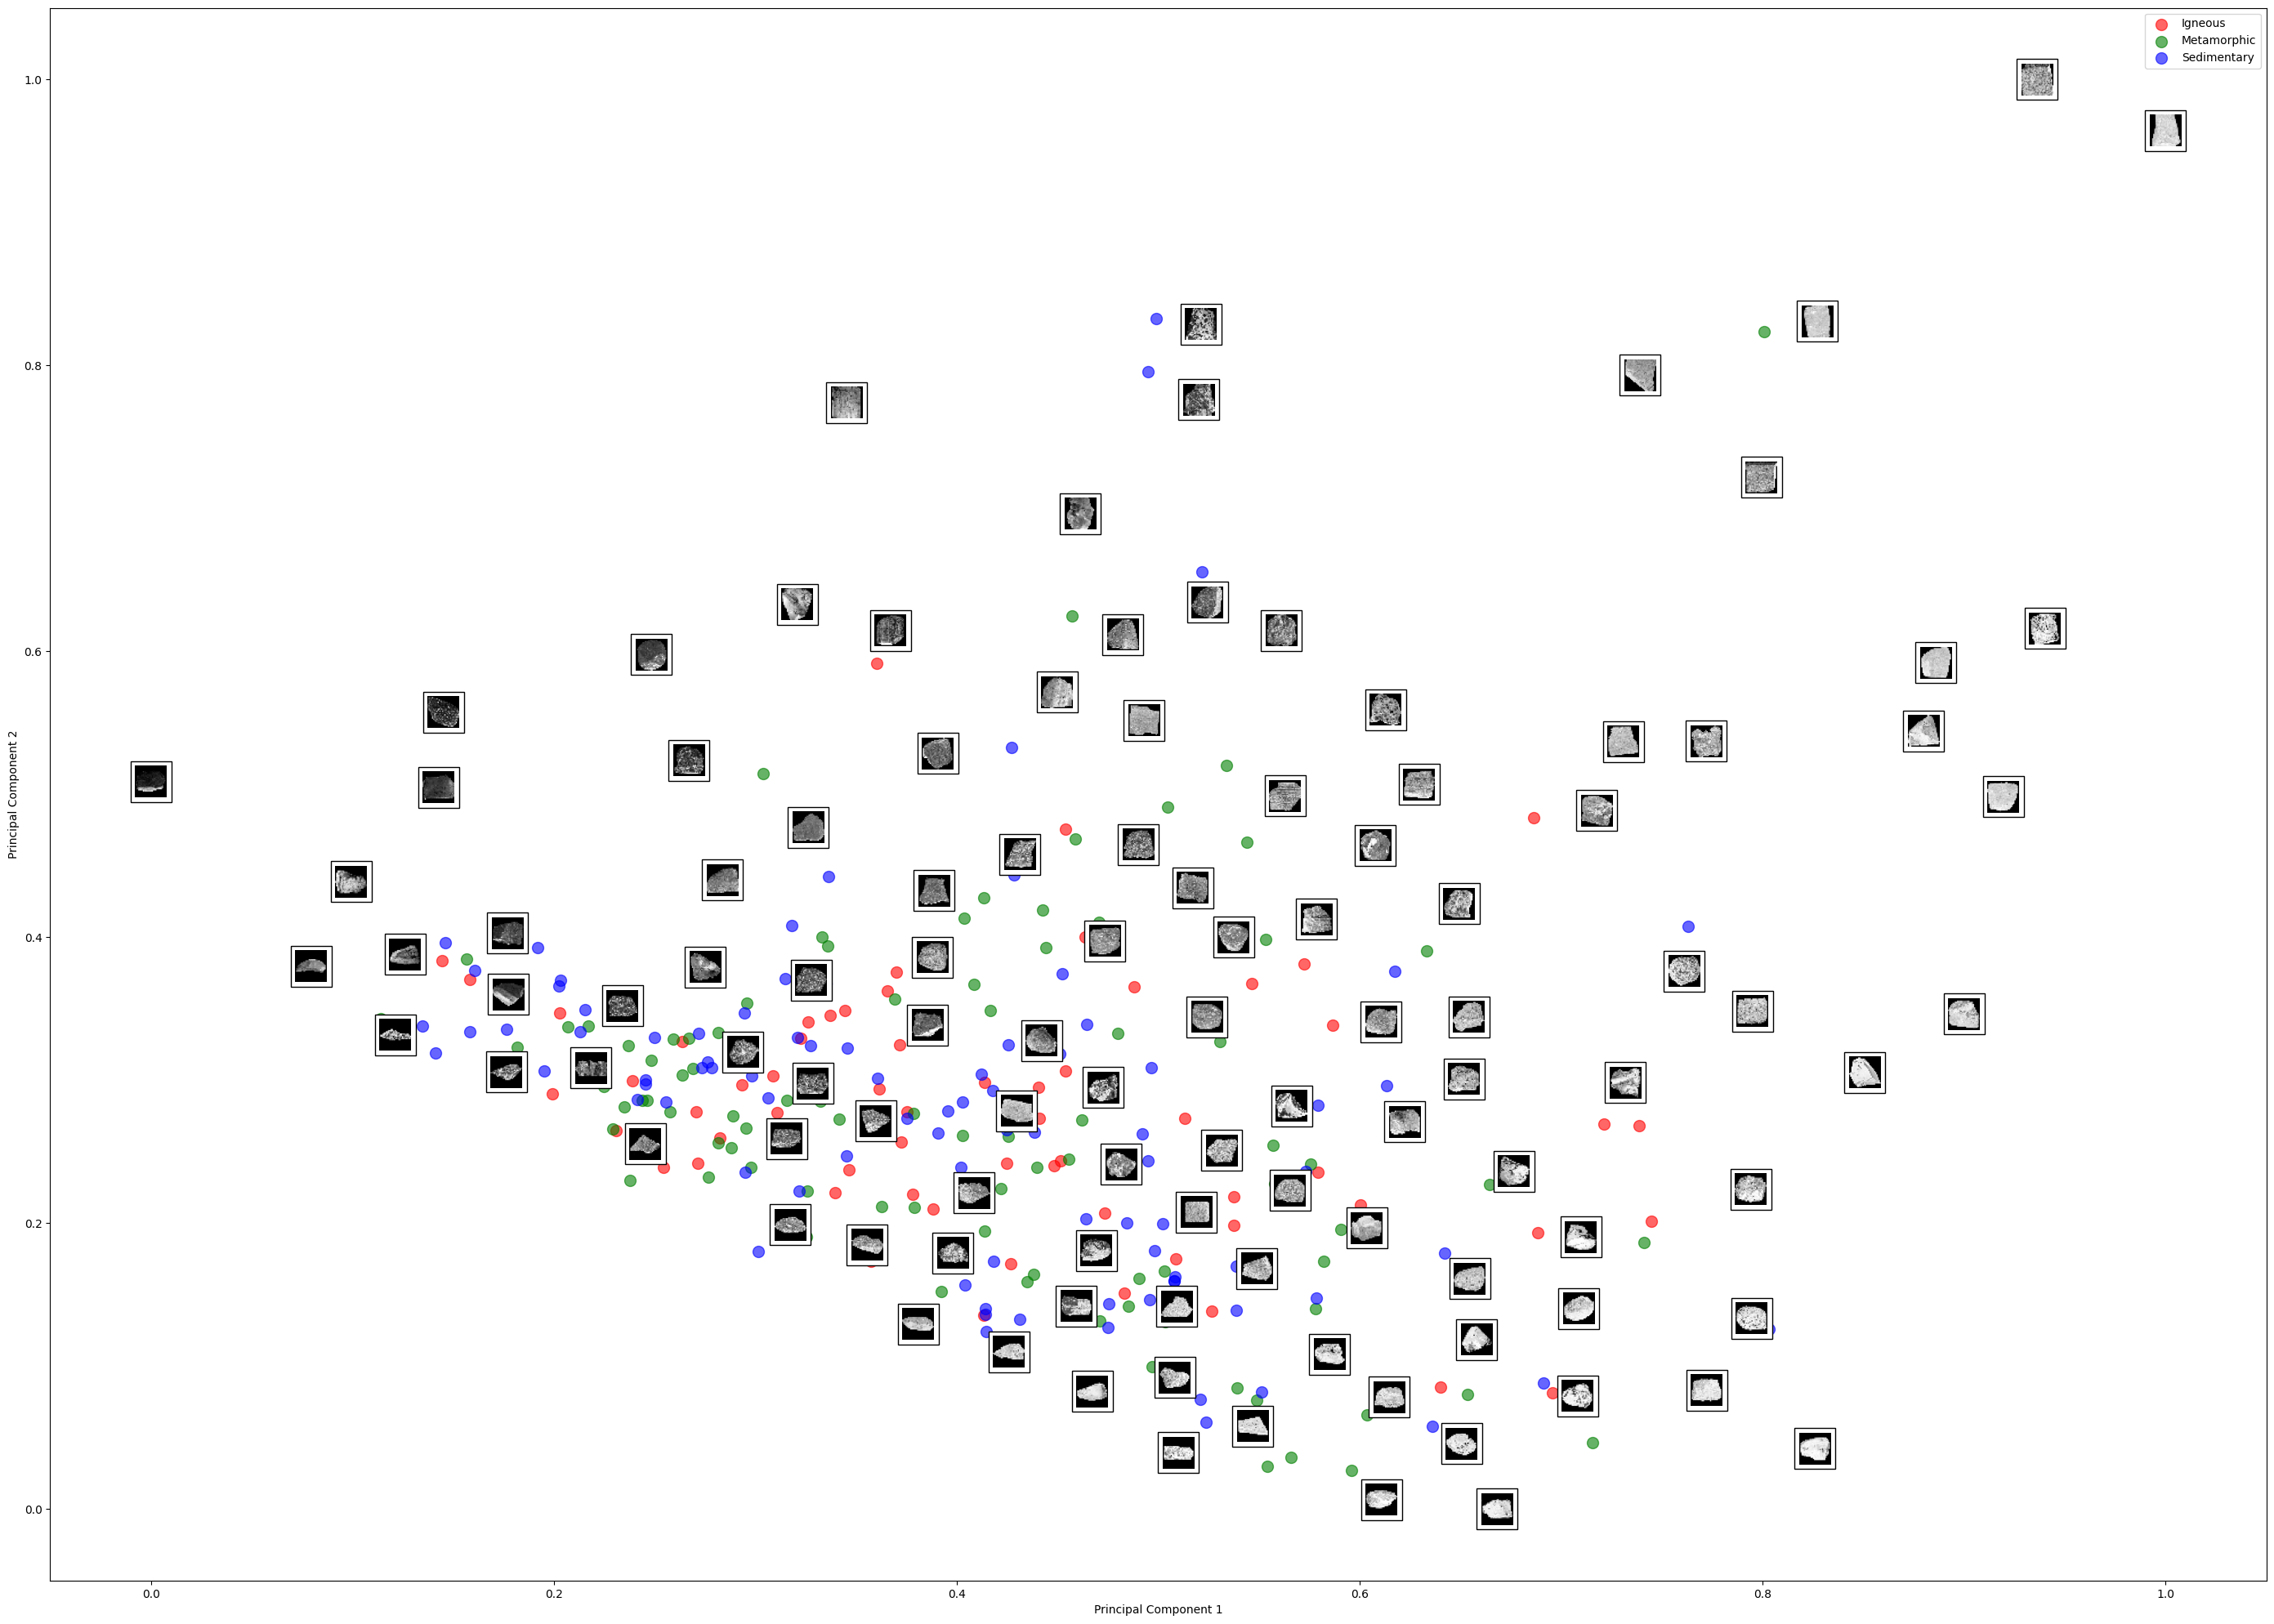

In [ ]:
plot_rocks(X_pca_reduced, y, images = compressed_images , figsize=(35,25))

# TSNE

Following are plots for data after using TSNE to reduce the dimensionality to 2. The plot has some images of corresponding category labels with it.

In [ ]:
# For TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(images_standardized)

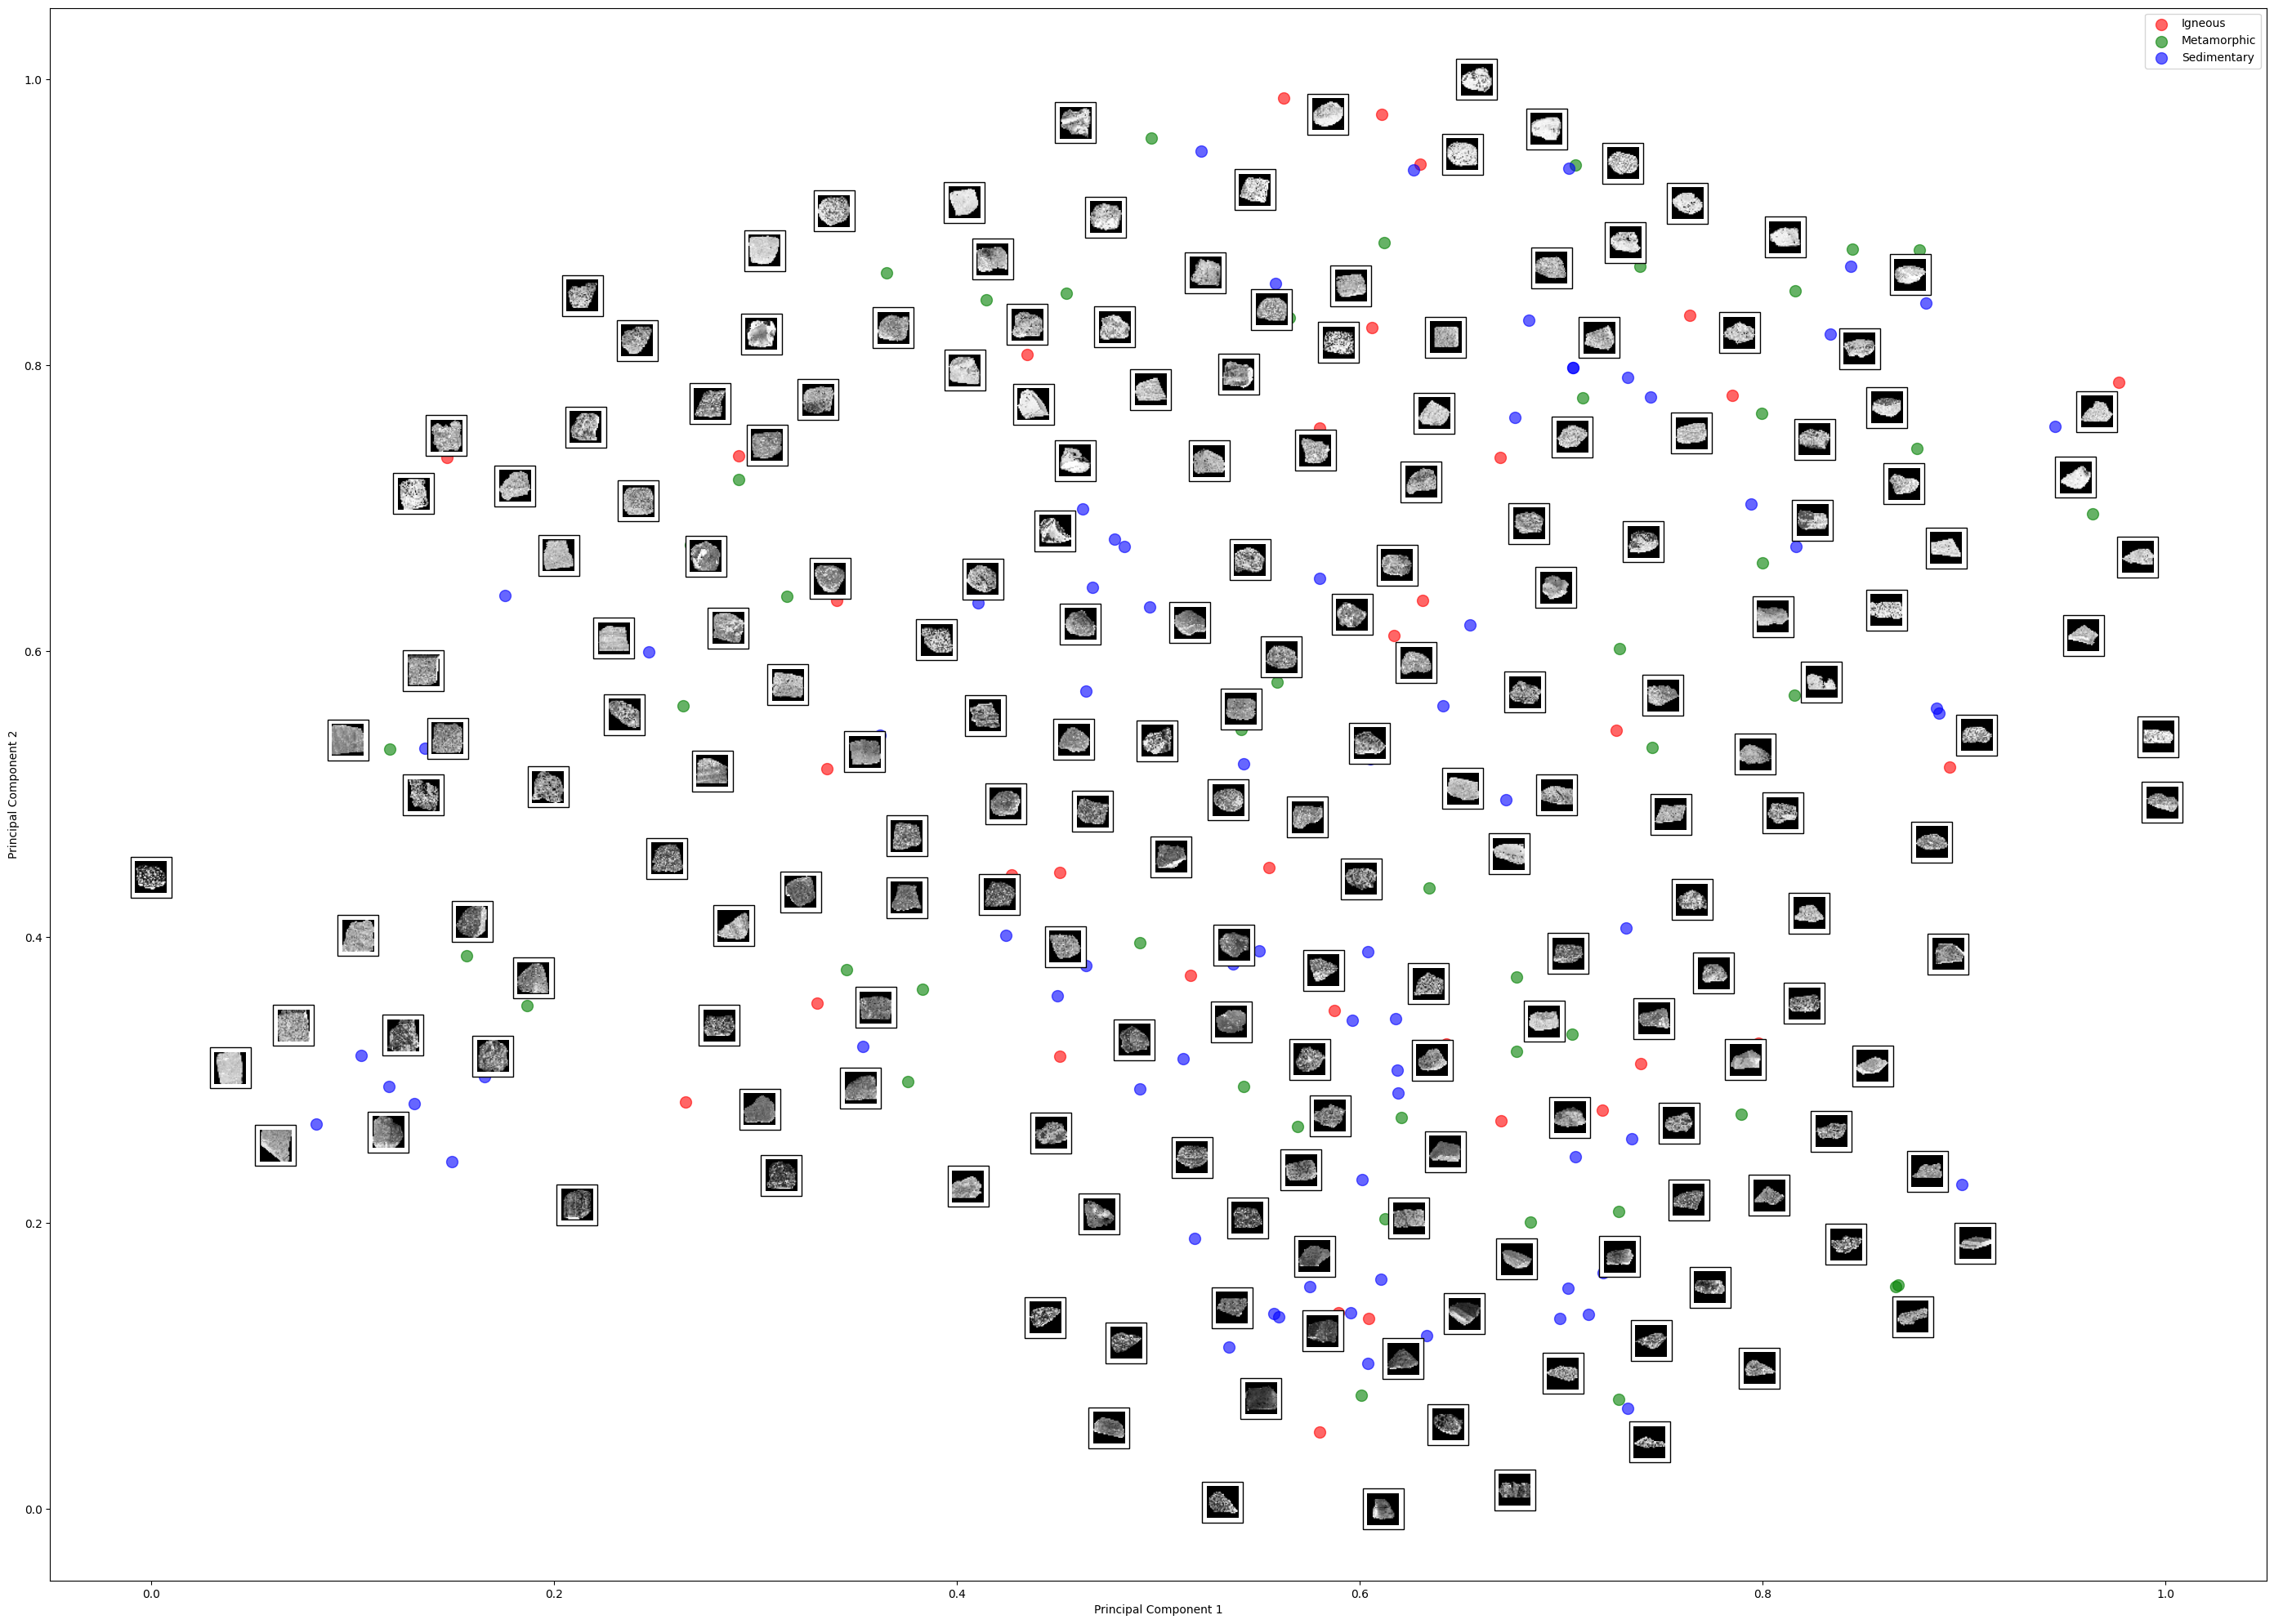

In [ ]:
plot_rocks(X_reduced_tsne, y , images = compressed_images, figsize=(35,25))

# LLE

Following are plots for data after using LLE to reduce the dimensionality to 2. The plot has some images of corresponding category labels with it.

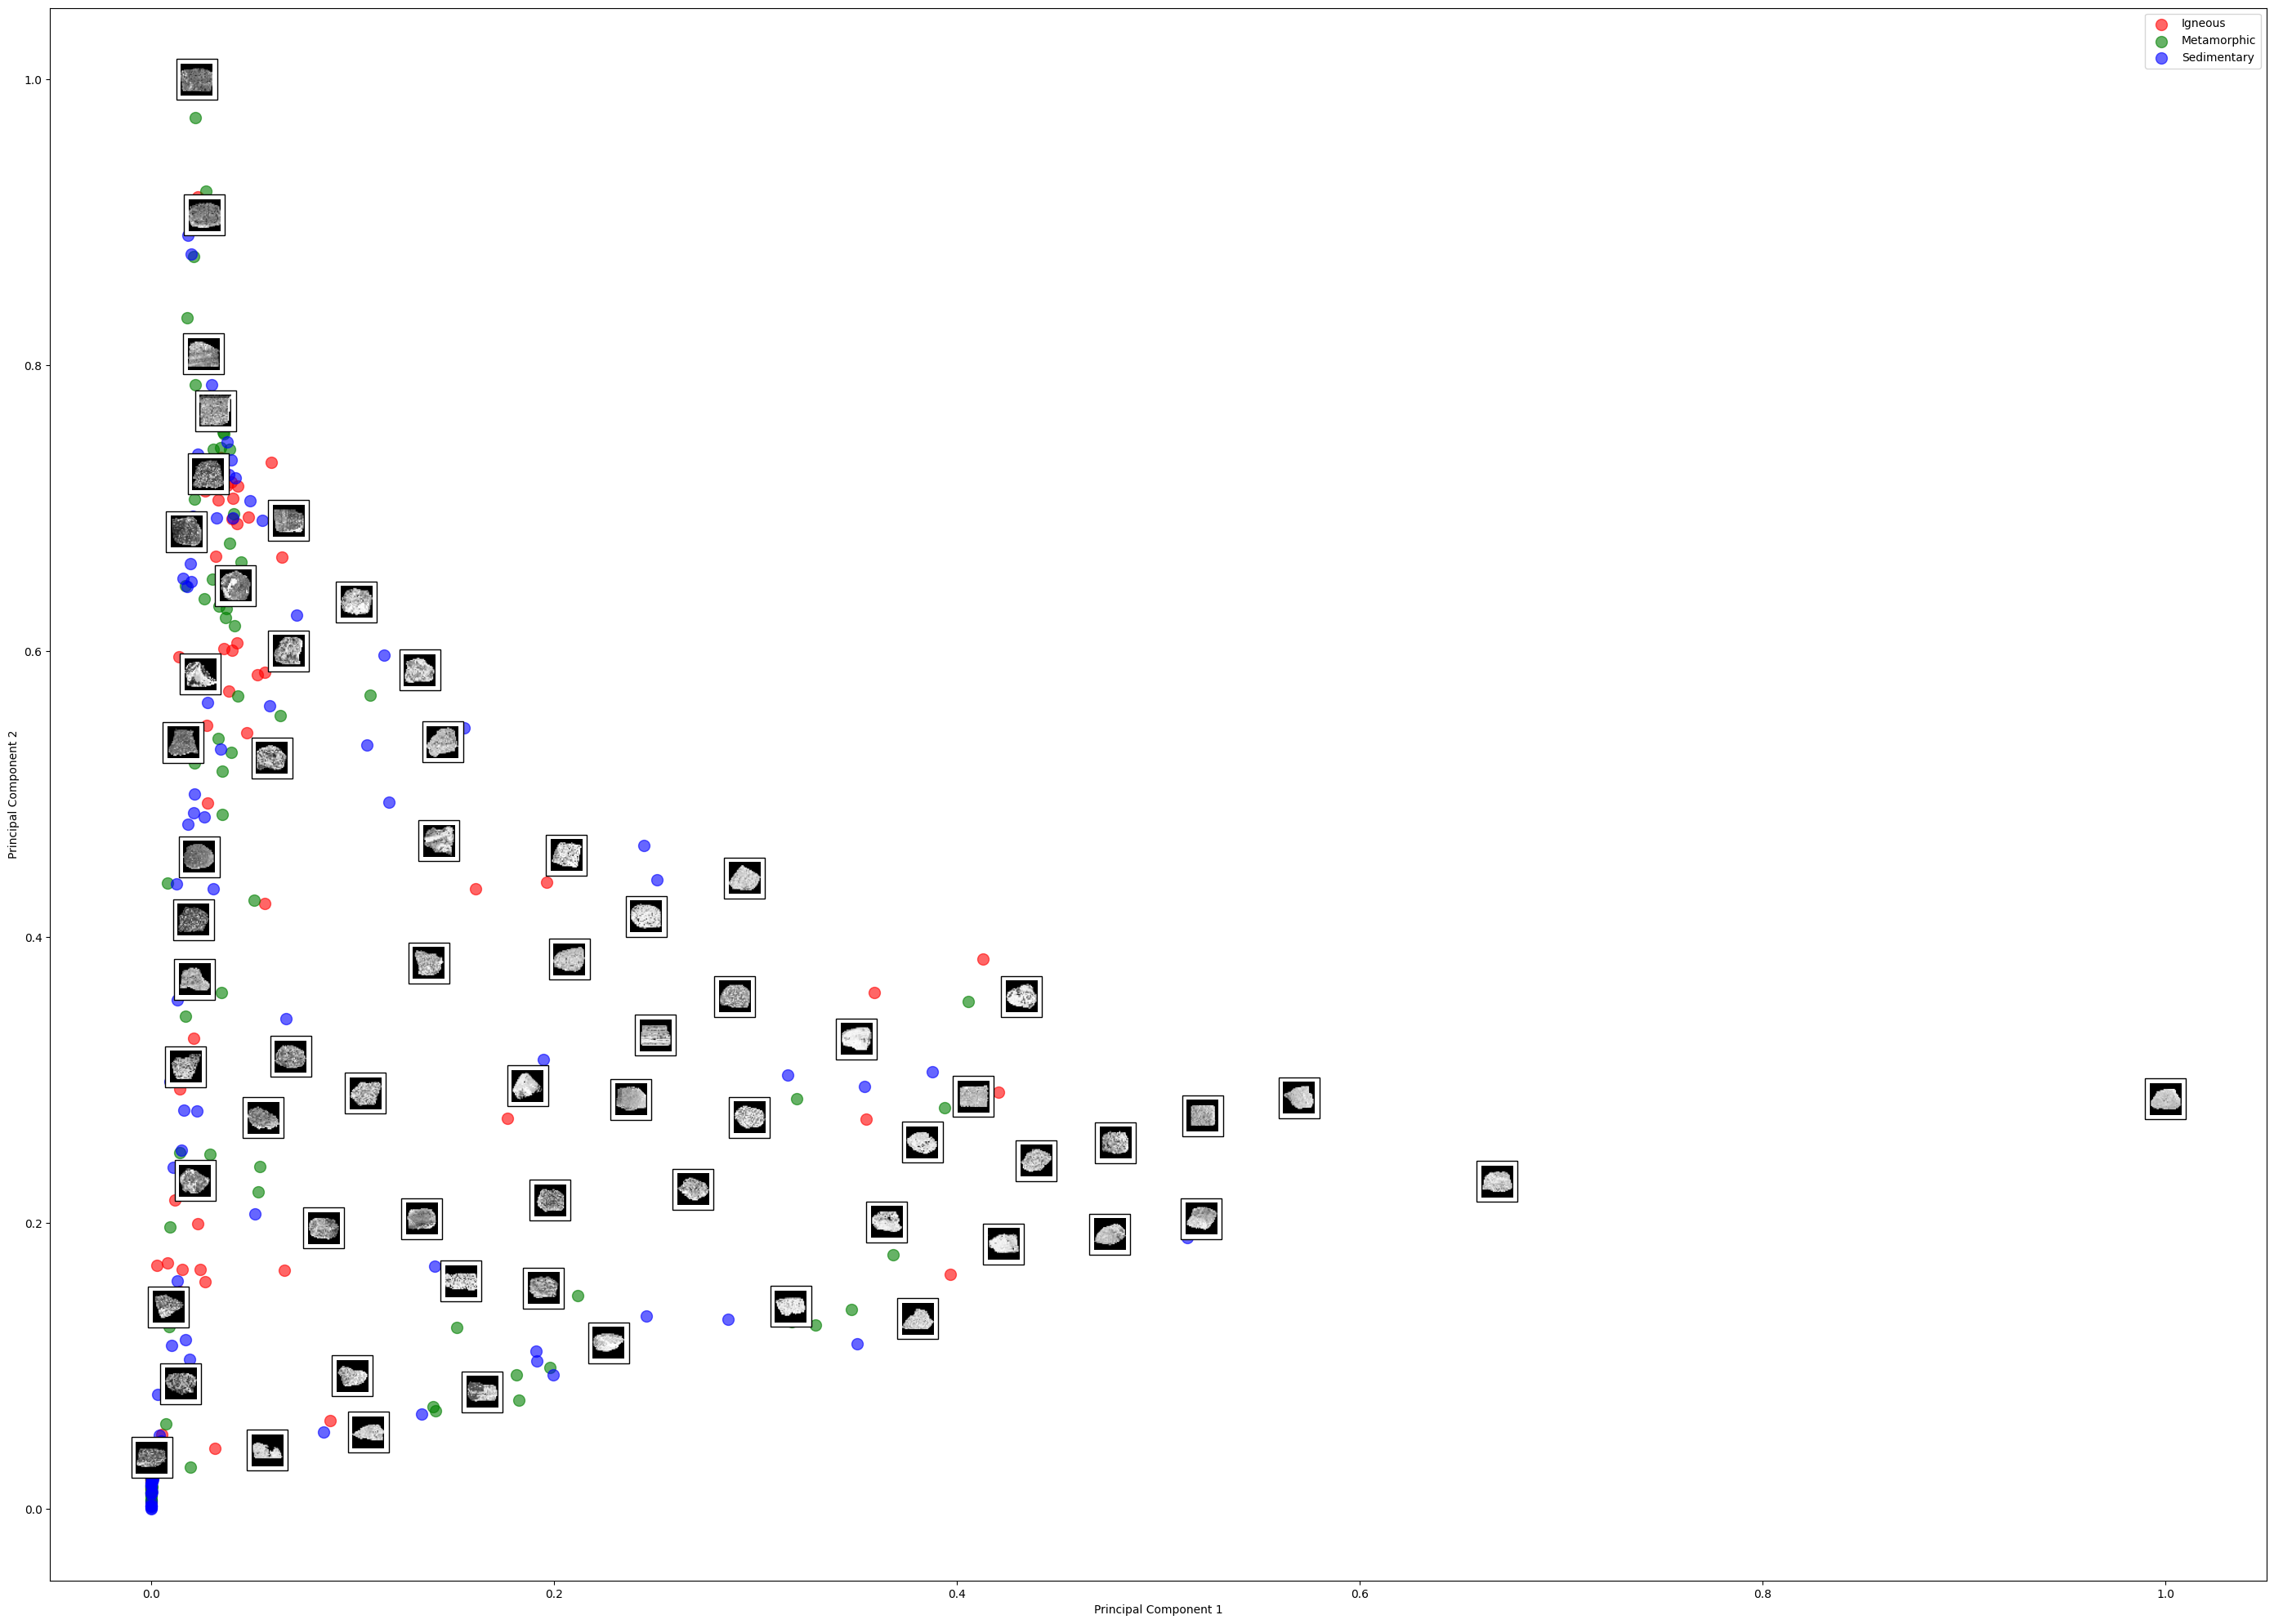

In [ ]:
# For LLE
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle_reduced = lle.fit_transform(images_standardized)

plot_rocks(X_lle_reduced, y , images = compressed_images, figsize=(35,25))
plt.show()

# MDS

Following are plots for data after using MDS to reduce the dimensionality to 2. The plot has some images of corresponding category labels with it.

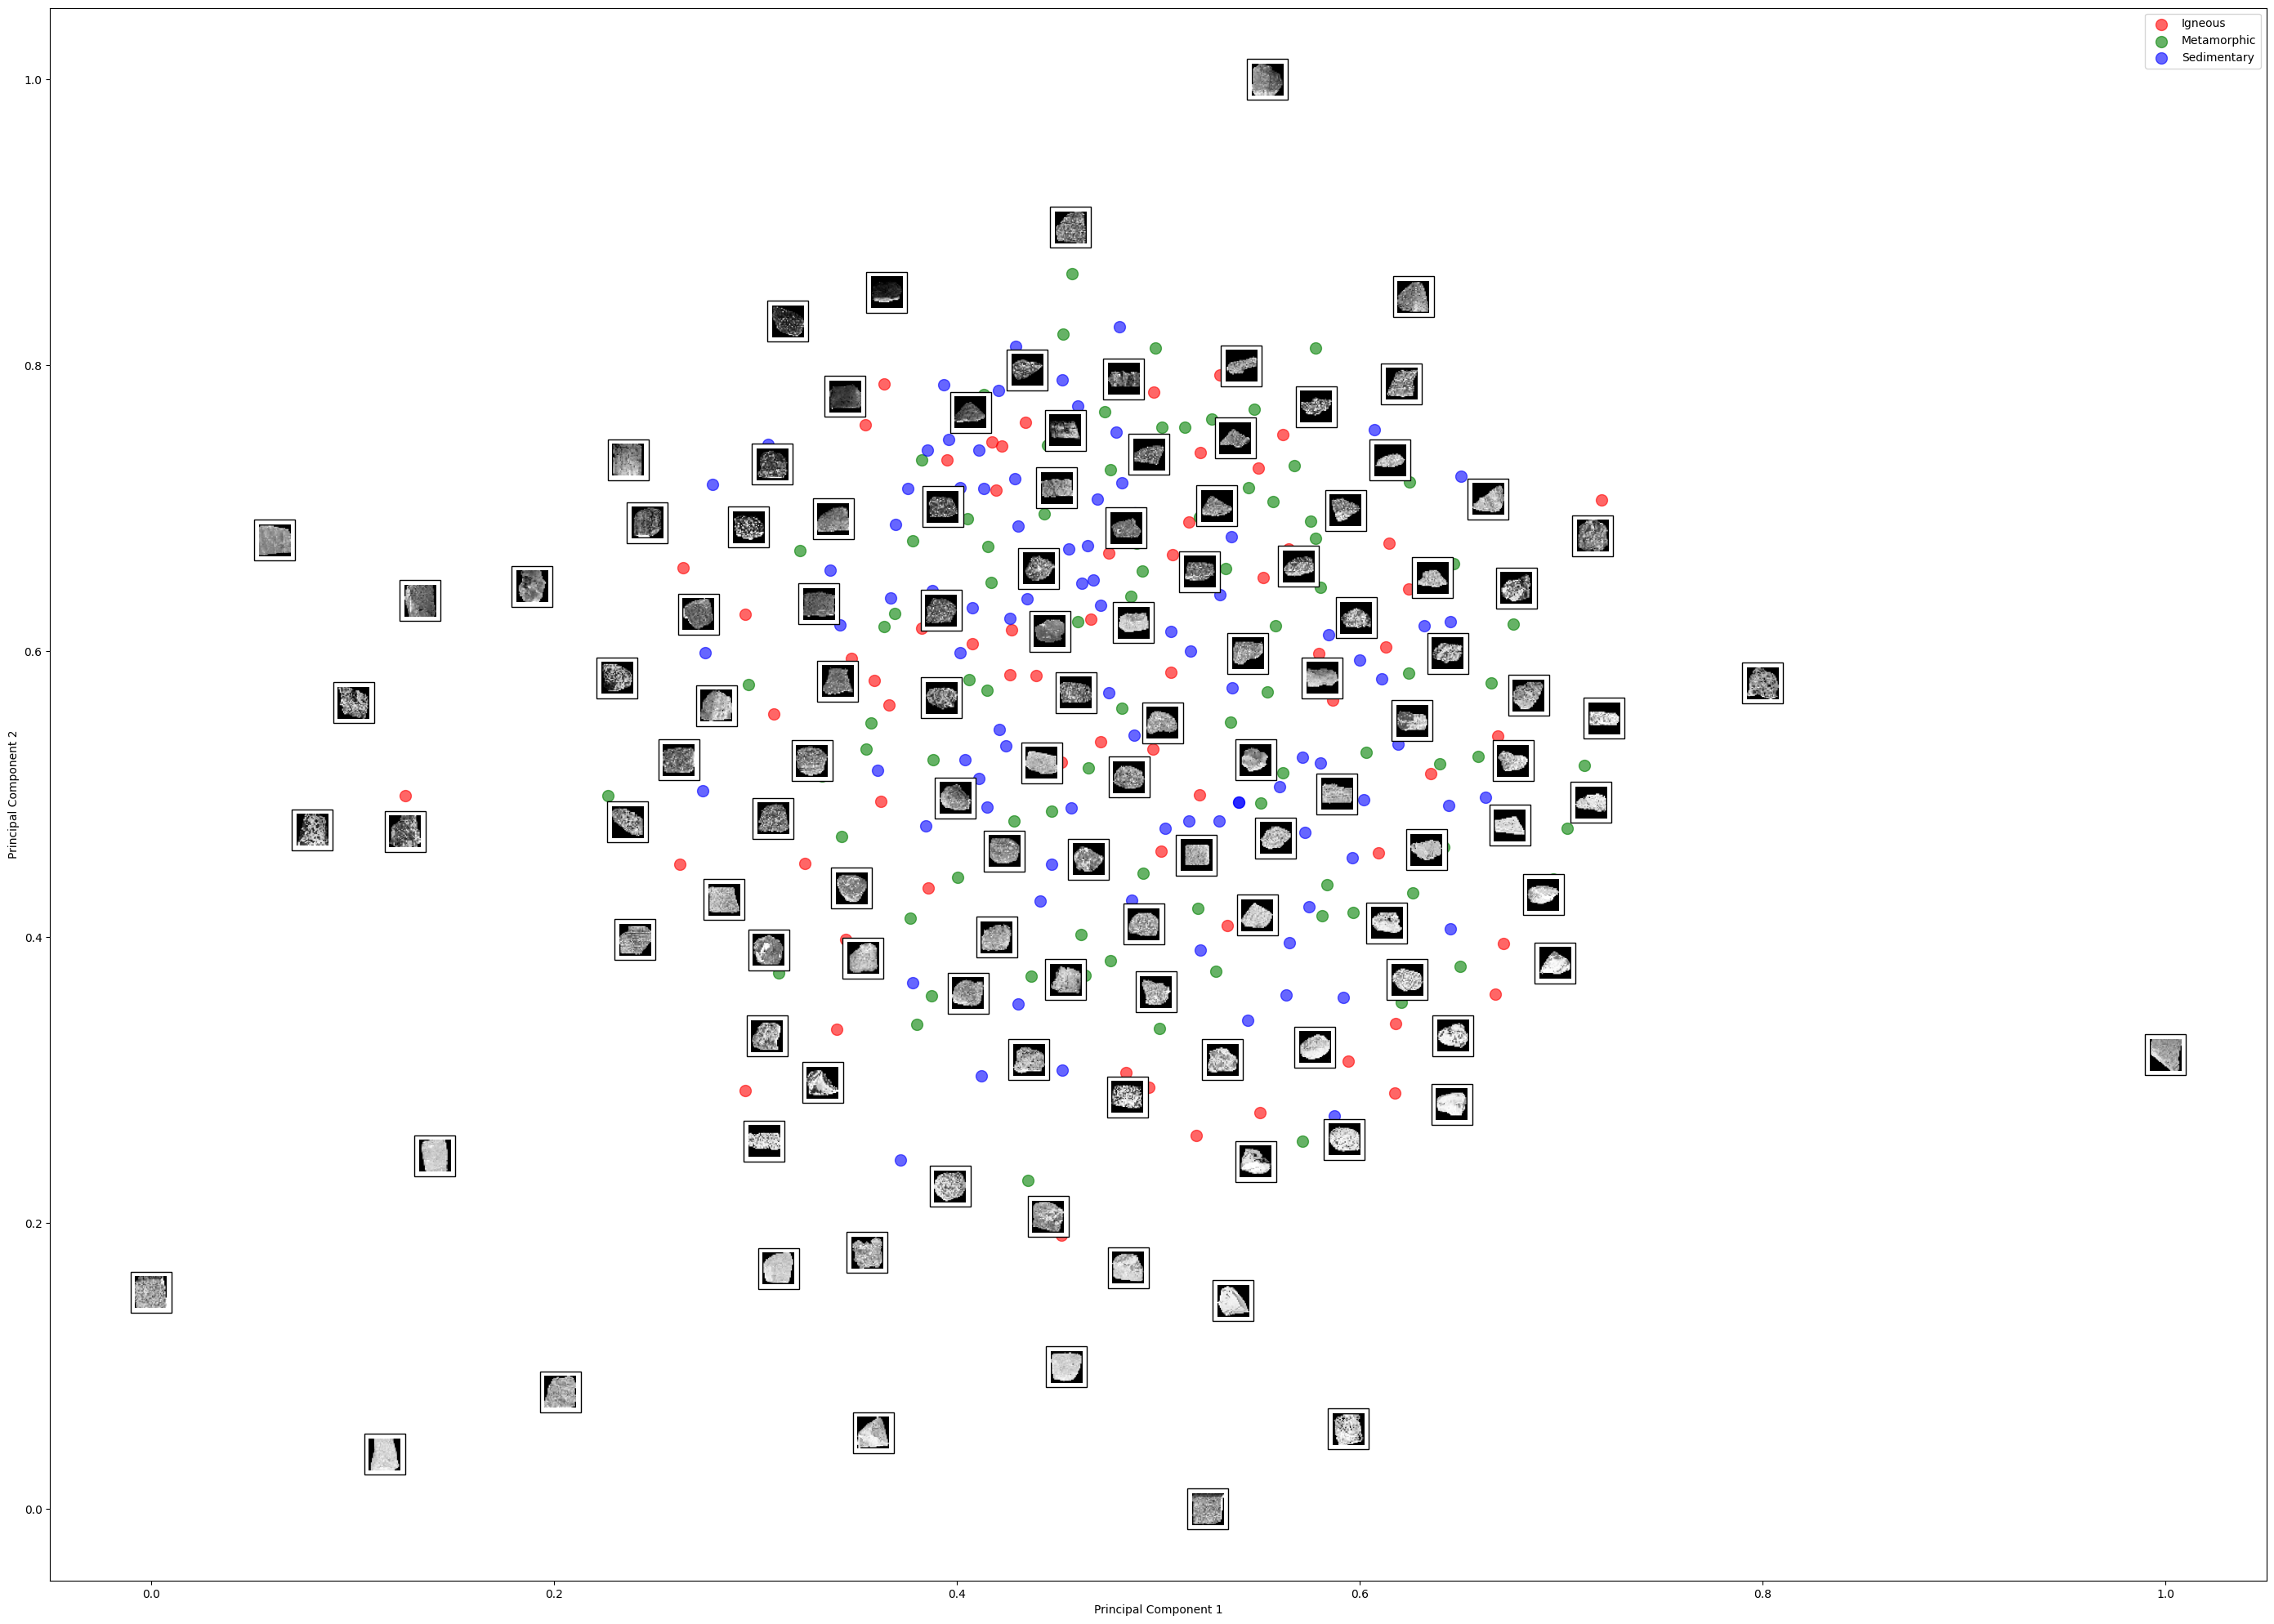

In [ ]:
#For MDS
from sklearn.manifold import MDS
X_mds_reduced = MDS(n_components=2, normalized_stress=False, random_state=42).fit_transform(images_standardized)
plot_rocks(X_mds_reduced, y , images = compressed_images, figsize=(35,25))
plt.show()

**C. Which of the visualizations do you prefer?**

Out of all the visualizations that we tried this data on, MDS gave the best clustering results. The MDS plot shows separately distinguished categories of rocks at a better level as compared to the other techniques. The images belonging to same category are clustered together at a great extend. Also, MDS helps to understand the linear relationship between the data and captures pairwise distances better than other techniques.

# **Question 4**

**Now let's see if these dimensionality reduction techniques can give us similar features to those that humans use to judge the images. File mds_360.txt contains 8 features for each of the images (rankings are in the same order as the images in  '360 Rocks' folder. Run PCA, t-SNE, LLE and MDS to reduce the dimensionality of the images to 8. Then, compare those image embeddings with the ones from humans that are in the mds_360.txt file. Use Procrustes analysis to do the comparison (here is one example of how to do that mtx1, mtx2, disparity = procrustes(matrix_with_human_data, matrix_with_pca_embeddings_data). Here matrix_with_human_data and matrix_with_pca_embeddings_data should be 360 by 8. disparity will tell you the difference in the data. Report disparity for each of the four dimensionality reduction methods. Compute the correlation coefficient between each dimension of mtx1 and mtx2 for each of the four methods - display results in a table**

In [ ]:
mds_360 = pd.read_csv('/content/drive/MyDrive/mds_360.txt', sep='\s+', header = None)

In [ ]:
mds_360

0      1      2      3      4      5      6      7
0   -3.743 -1.204  2.001  0.164 -0.077 -1.992  4.950  1.695
1    2.332  1.625  0.985 -3.223 -1.308  0.093  6.724  0.708
2    0.346  1.490 -3.795 -1.653  1.083 -3.786  0.706 -2.854
3    0.320  1.842 -0.352 -3.178 -3.670  0.699  1.499 -0.877
4   -0.228  5.029  1.033 -3.007  0.749 -3.479 -0.285  0.255
..     ...    ...    ...    ...    ...    ...    ...    ...
355 -2.753 -3.870 -1.539 -2.959 -0.486  3.884  0.705 -3.588
356 -3.539 -0.954 -1.209 -0.805 -1.359  1.841 -3.529 -0.125
357 -3.475 -3.431 -2.184 -2.034  0.691 -2.265  1.129 -1.201
358 -0.051 -2.358  1.994 -1.427  1.552  7.268 -0.593 -1.432
359  1.134 -4.900  0.983 -3.777 -1.265  4.695  0.624 -1.195

[360 rows x 8 columns]

In [ ]:
images_flattened = np.array([image.flatten() for image in images])
scaler = MinMaxScaler()
images_standardized = scaler.fit_transform(images_flattened)
n_components = 8

In [ ]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(images_standardized)

In [ ]:
tsne = TSNE(n_components=n_components, method='exact', random_state=42)
X_tsne = tsne.fit_transform(images_standardized)

# Perform LLE
lle = LocallyLinearEmbedding(n_components=n_components, random_state=42)
X_lle = lle.fit_transform(images_standardized)

# Perform MDS
mds = MDS(n_components=n_components, random_state=42)
X_mds = mds.fit_transform(images_standardized)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
from scipy.spatial import procrustes
from tabulate import tabulate

In [ ]:
methods = ['PCA', 't-SNE', 'LLE', 'MDS']
disparities = []
for i, embeddings in enumerate([X_pca, X_tsne, X_lle, X_mds]):
    _, _, disparity = procrustes(mds_360, embeddings)
    disparities.append(disparity)
    # print(f"{methods[i]} Disparity: {disparity}")

# Compute and display correlation coefficients
correlation_matrix = np.zeros((n_components, n_components, len(methods)))

for i, embeddings in enumerate([X_pca, X_tsne, X_lle, X_mds]):
    _, _, correlation_matrix[:, :, i] = procrustes(mds_360, embeddings)


# print("\nCorrelation Coefficients:")
table_data = []
for i, method in enumerate(methods):
    table_data.append([method, disparities[i]])
    # print(f"\n{method}:\n")
    for j in range(n_components):
        # print(f"Dimension {j + 1}: {correlation_matrix[j, :, i]}")
        table_data.append([f"Dimension {j + 1}", correlation_matrix[j, :, i]])

headers = ["Method/Dimension", "Disparity"] + [f"{method} - Dimension {j + 1}" for method in methods for j in range(n_components)]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+--------------------------------------------------------------------+
| Method/Dimension   | Disparity                                                          |
+====================+====================================================================+
| PCA                | 0.9857887759241852                                                 |
+--------------------+--------------------------------------------------------------------+
| Dimension 1        | [0.98578878 0.98578878 0.98578878 0.98578878 0.98578878 0.98578878 |
|                    |  0.98578878 0.98578878]                                            |
+--------------------+--------------------------------------------------------------------+
| Dimension 2        | [0.98578878 0.98578878 0.98578878 0.98578878 0.98578878 0.98578878 |
|                    |  0.98578878 0.98578878]                                            |
+--------------------+----------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/tabulate/__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


The Procrustes disparity analysis done for all the four methods show that LLE has the lowest disparaity out of all the methods performed. - - In general, lower disparity values suggest a better alignment between the human rankings and the embeddings generated by the dimensionality reduction technique. Similarly, a higher correlation coefficient is preferred which indicated better relation with the original data. The coefficient value closer to 1 is better.



# **Question 5**

**Cluster the 360 images using K-Means**

**A.To speed up the algorithm, use PCA to reduce the dimensionality of the dataset to two. Determine the number of clusters using one of the techniques we discussed in class**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

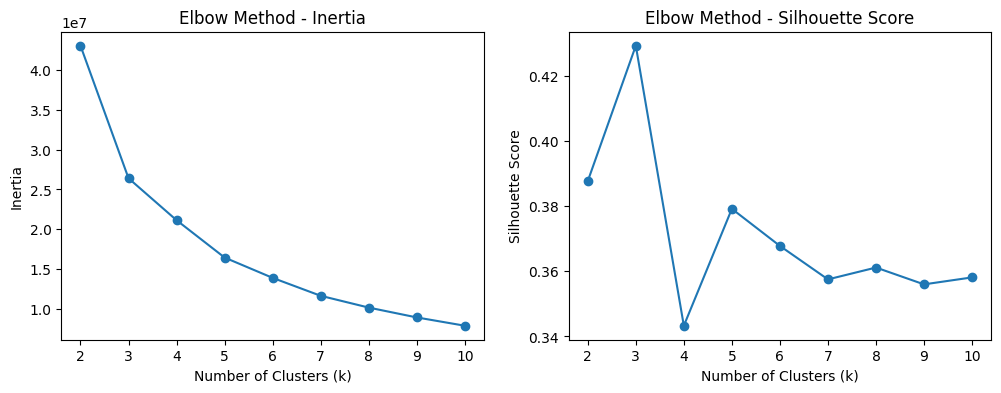

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assuming X_reduced is your reduced feature matrix
inertia_values = []
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_reduced)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca_reduced, kmeans.labels_))

# Plot the Elbow method
plt.figure(figsize=(12, 4))

# Plot Inertia values
plt.subplot(1, 2, 1)
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.title('Elbow Method - Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

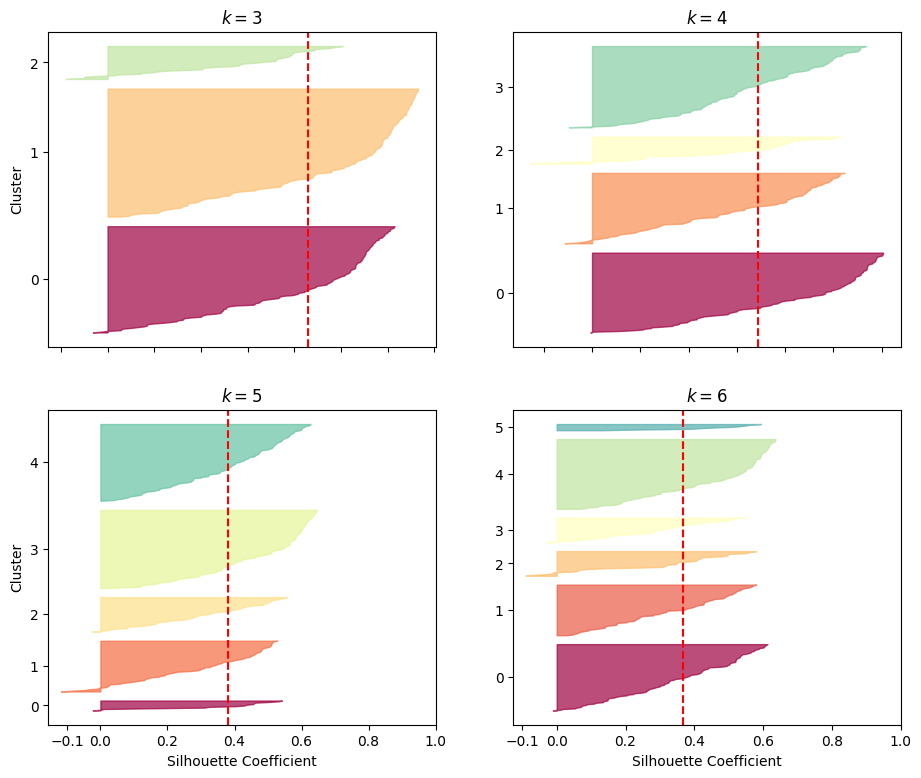

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

# Assuming X_pca is defined and is your dataset reduced to principal components

# Train KMeans for different values of k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca_reduced) for k in range(2, 7)]

# Calculate silhouette scores for each k
silhouette_scores = [silhouette_samples(X_pca_reduced, model.labels_) for model in kmeans_per_k]

# Plotting the silhouette diagrams
plt.figure(figsize=(11, 9))

for k in range(3, 7):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_scores[k - 2]

    padding = len(X_pca_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=np.mean(silhouette_coefficients), color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

We can calculate the number of optimal clusters in K-means using Elbow method as well as Silhoutte method. In our case, both the methods give the optimal number of clusters as 3. We do have 3 categories of rocks in our original dataset so the clustering of these rocks is done appropriately. The clustering becomes easy with PCA as the dimensions of the original images are reduced which makes it easier for the algorithm to process the images.

**B. Visualize the clusters in a similar way to the visualization after line 28 here: https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynbLinks to an external site., but color each dot based on the clusters it belongs to using the labels taken from the filename as in question 3  (I, M and S).**

In [ ]:
# Assuming n_clusters is the determined number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca_reduced)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


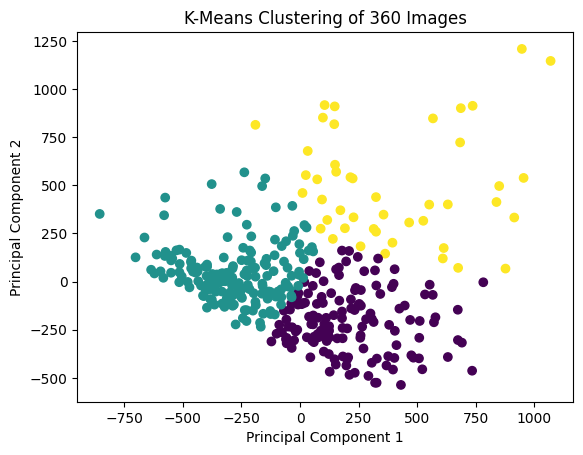

In [ ]:
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering of 360 Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


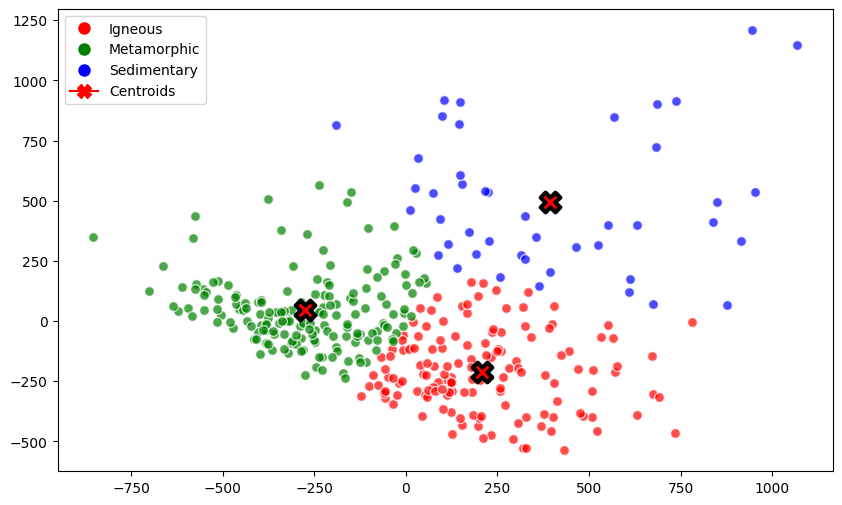

In [ ]:
# Train a KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca_reduced)
categories = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a mapping of category to color with full names for the legend
category_colors = {0: 'red', 1: 'green', 2: 'blue'}
category_names = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}

def plot_clusters(X, categories, centroids):
    plt.figure(figsize=(10, 6))

    for category, color in category_colors.items():
        subset = X[categories == category]
        plt.scatter(subset[:, 0], subset[:, 1], c=color, label=category_names[category], alpha=0.7, edgecolors='w', s=50)

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='red', edgecolors='k', label='Centroids')
    # Custom Legend
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Igneous', markersize=10, markerfacecolor='red'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Metamorphic', markersize=10, markerfacecolor='green'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Sedimentary', markersize=10, markerfacecolor='blue'),
                        plt.Line2D([0], [0], marker='X', color='red', label='Centroids', markersize=10)])

    plt.show()

# Plotting the clusters and centroids
plot_clusters(X_pca_reduced, categories, centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-60-6843d29d7134>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.get_cmap('Set3', np.unique(categories).size))


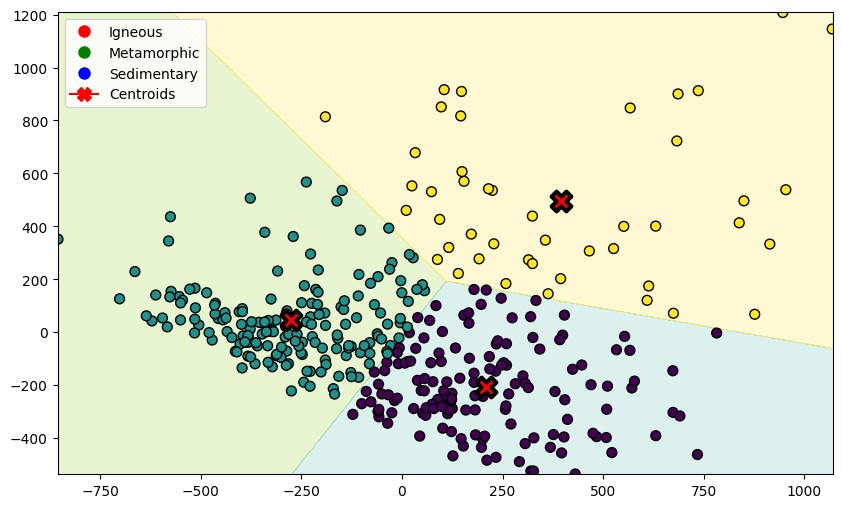

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_clusters_with_boundaries(X, categories, centroids, resolution=1000):
    # Create a mesh grid for decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict cluster index for each point on the grid
    Z = centroids.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.get_cmap('Set3', np.unique(categories).size))

    # Scatter plot of the actual data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=categories, edgecolors='k', s=50)
    plt.scatter(centroids.cluster_centers_[:, 0], centroids.cluster_centers_[:, 1], marker='X', s=200, linewidths=3, color='red', edgecolors='k', label='Centroids')

    # Custom Legend
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Igneous', markersize=10, markerfacecolor='red'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Metamorphic', markersize=10, markerfacecolor='green'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Sedimentary', markersize=10, markerfacecolor='blue'),
                        plt.Line2D([0], [0], marker='X', color='red', label='Centroids', markersize=10)])
    plt.show()

# Example usage
# Assuming X_pca is your data, and kmeans_final is your KMeans model
kmeans_final = KMeans(n_clusters=3, random_state=42).fit(X_pca_reduced)
categories = kmeans_final.labels_
plot_clusters_with_boundaries(X_pca_reduced, categories, kmeans_final)


The decision boundary is instrumental in delineating cluster boundaries that effectively segregate rocks into distinct categories. The centroid of each cluster is visibly presented, illustrating the distance of data points within each cluster from their respective centroids. Notably, our plot indicates the absence of outliers in the dataset.

# **Question 6**

**A. Same as in the previous question, to speed up the algorithm, use PCA to reduce the dimensionality of the dataset to two. Determine the number of clusters using one of the techniques we discussed in class.**

To determine the optimal number of clusters in the Expectation Maximization (EM) algorithm, we employed the Bayesian information criterion (BIC). Utilizing maximum likelihood estimation, BIC aids in selecting the most fitting model from a range of candidate models. In our specific scenario, BIC indicates that the optimal cluster count is 3, precisely matching the number of rock categories in our dataset.

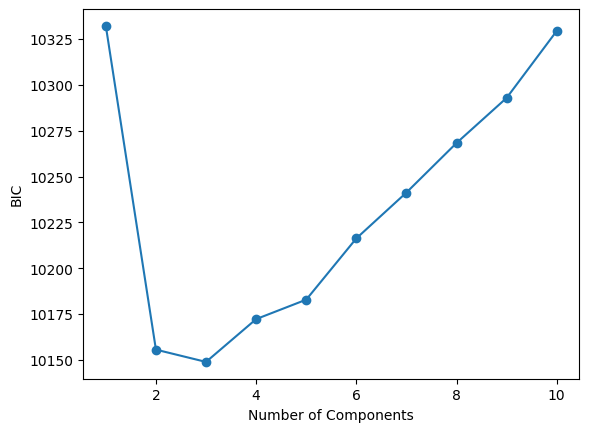

In [ ]:
from sklearn.mixture import GaussianMixture

# Assuming X_reduced is your reduced feature matrix
n_components = range(1, 11)
bic = []

for n in n_components:
    em = GaussianMixture(n_components=n, random_state=42)
    em.fit(X_pca_reduced)
    bic.append(em.bic(X_pca_reduced))


# Plot BIC
plt.plot(n_components, bic, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.show()


# Choose the number of components with the lowest BIC
optimal_components = n_components[np.argmin(bic)]


**B. Visualize the clusters in a similar way to the visualization after line 28 here: https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynbLinks to an external site., but color each dot based on the clusters it belongs to using the labels taken from the filename as in question 3  (I, M and S).**

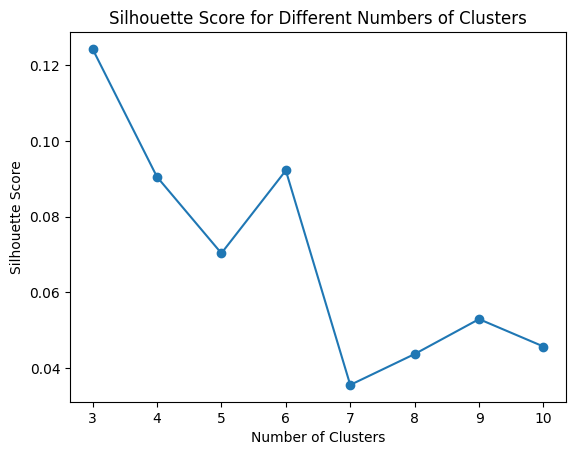

Optimal number of clusters: 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


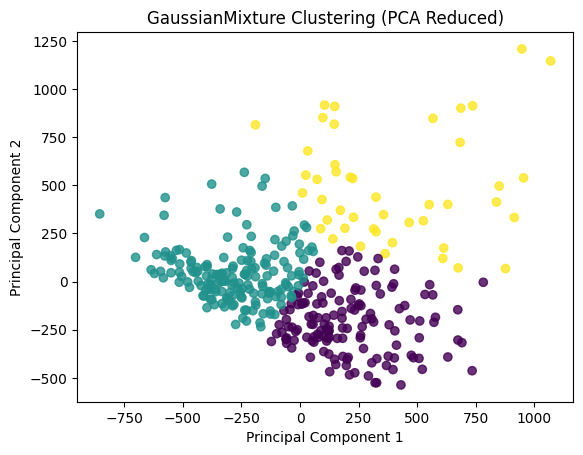

In [ ]:
silhouette_scores = []
possible_cluster_range = range(3, 11)  # You can adjust the range based on your needs

for n_components in possible_cluster_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    cluster_labels = gmm.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to help determine the optimal number of clusters
plt.plot(possible_cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal number of clusters based on the plot or other criteria
optimal_num_clusters = possible_cluster_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_num_clusters}')

# Perform K-Means clustering with the optimal number of clusters
gmm_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels_optimal = gmm_optimal.fit_predict(X_pca_reduced)

# Visualize the clusters in 2D
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=cluster_labels_optimal, cmap='viridis', alpha=0.8)
plt.title('GaussianMixture Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


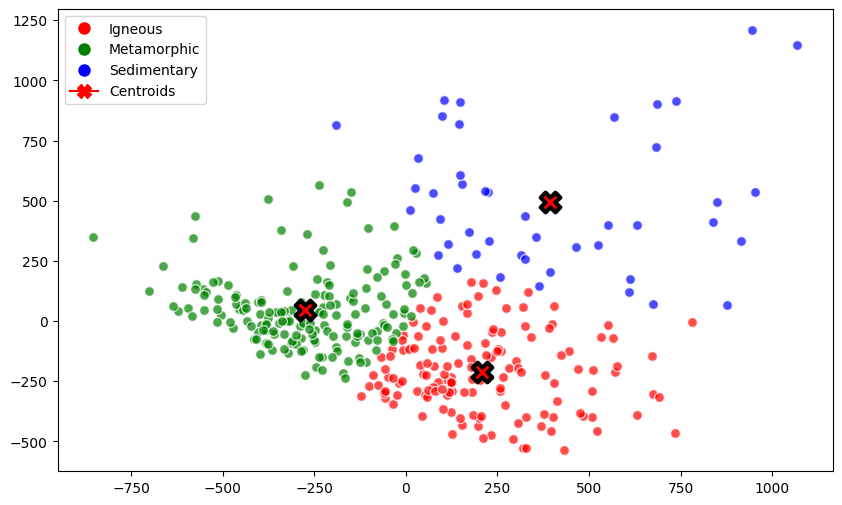

In [ ]:
# Train a KMeans model
gmm_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels_optimal = gmm_optimal.fit_predict(X_pca_reduced)
categories = gmm_optimal.labels_
centroids = gmm_optimal.cluster_centers_

# Create a mapping of category to color with full names for the legend
category_colors = {0: 'red', 1: 'green', 2: 'blue'}
category_names = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}

def plot_clusters(X, categories, centroids):
    plt.figure(figsize=(10, 6))

    for category, color in category_colors.items():
        subset = X[categories == category]
        plt.scatter(subset[:, 0], subset[:, 1], c=color, label=category_names[category], alpha=0.7, edgecolors='w', s=50)

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='red', edgecolors='k', label='Centroids')
    # Custom Legend
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Igneous', markersize=10, markerfacecolor='red'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Metamorphic', markersize=10, markerfacecolor='green'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Sedimentary', markersize=10, markerfacecolor='blue'),
                        plt.Line2D([0], [0], marker='X', color='red', label='Centroids', markersize=10)])

    plt.show()

# Plotting the clusters and centroids
plot_clusters(X_pca_reduced, categories, centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-64-4292f073a973>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.get_cmap('Set3', np.unique(categories).size))


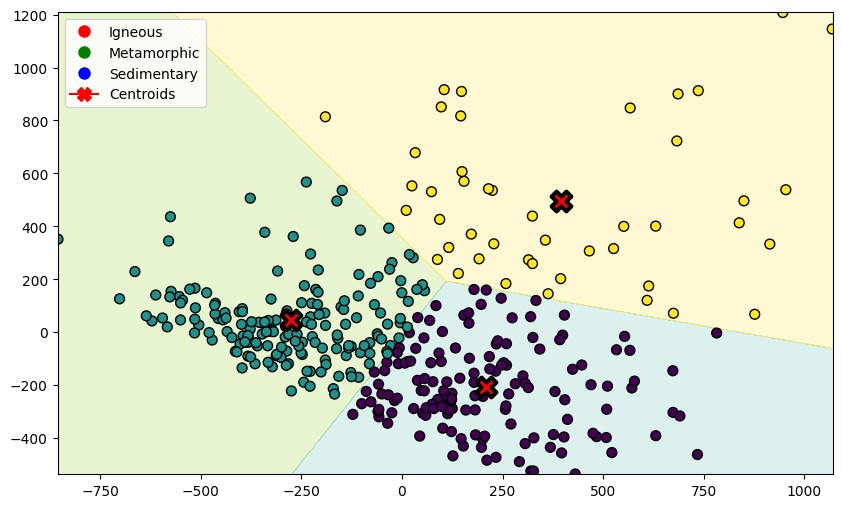

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_clusters_with_boundaries(X, categories, centroids, resolution=1000):
    # Create a mesh grid for decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict cluster index for each point on the grid
    Z = centroids.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.get_cmap('Set3', np.unique(categories).size))

    # Scatter plot of the actual data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=categories, edgecolors='k', s=50)
    plt.scatter(centroids.cluster_centers_[:, 0], centroids.cluster_centers_[:, 1], marker='X', s=200, linewidths=3, color='red', edgecolors='k', label='Centroids')

    # Custom Legend
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Igneous', markersize=10, markerfacecolor='red'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Metamorphic', markersize=10, markerfacecolor='green'),
                        plt.Line2D([0], [0], marker='o', color='w', label='Sedimentary', markersize=10, markerfacecolor='blue'),
                        plt.Line2D([0], [0], marker='X', color='red', label='Centroids', markersize=10)])
    plt.show()

# Example usage
# Assuming X_pca is your data, and kmeans_final is your KMeans model
gmm_final = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels_optimal = gmm_final.fit_predict(X_pca_reduced)
categories = gmm_final.labels_
plot_clusters_with_boundaries(X_pca_reduced, categories, gmm_final)


The decision boundary plays a crucial role in delineating cluster boundaries, effectively segregating rocks into distinct categories. In our plot, we employed the 'tied' covariance type of Gaussian models to partition the data points into their respective clusters. Notably, there are no outliers observed in the dataset, and the points are accurately clustered.

**C. Use the model to generate 20 new rocks (using the sample() method), and visualize them in the original image space (since you used PCA, you will need to use its inverse_transform() method).**

In this context, it is presumed that a GMM (Gaussian Mixture Model) and a PCA (Principal Component Analysis) model have been previously trained in our environment. Subsequently, the sample method of the GMM is employed to generate 20 new samples. To ensure compatibility with the original feature space, the inverse_transform method of the PCA model is applied, as the generated samples were likely produced in a reduced-dimensional space during the GMM training. The resulting plot visually represents the newly generated rock samples, encapsulating certain features of the original rock images.

Optimal number of clusters: 2


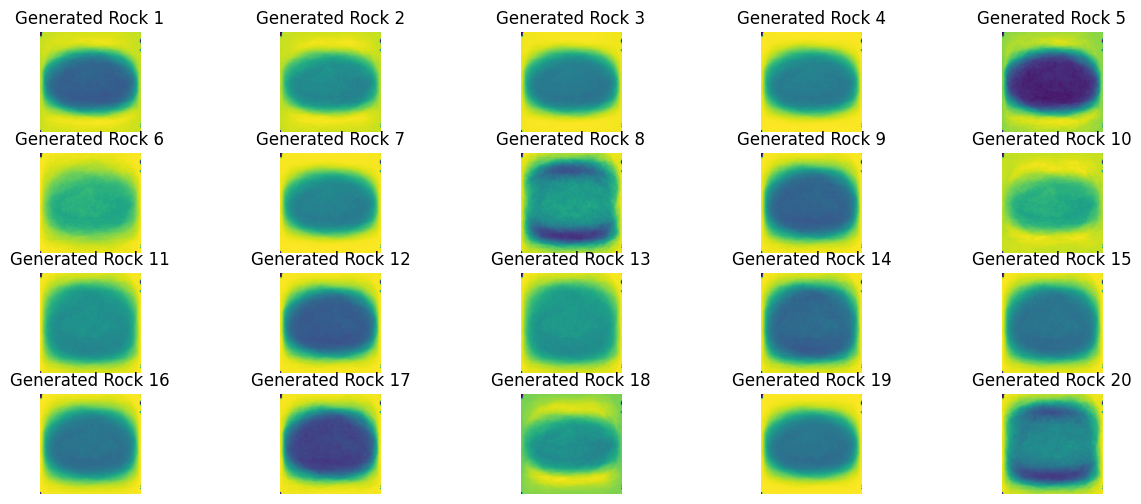

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have standardized images in 'images_standardized'

# Set the number of components for PCA
n_components_pca = 2  # Adjust based on your requirement
pca = PCA(n_components=n_components_pca)

# Flatten the images for PCA
images_flattened = np.array([image.flatten() for image in images_standardized])

# Apply PCA
images_pca = pca.fit_transform(images_flattened)

# Determine the optimal number of clusters using BIC
max_clusters = 10
bic_values = []

for n_clusters in range(1, max_clusters + 1):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(images_pca)
    bic_values.append(gmm.bic(images_pca))

# Determine the number of clusters based on the BIC values
optimal_num_clusters = np.argmin(bic_values) + 1  # Adding 1 because the loop starts from 1

print("Optimal number of clusters:", optimal_num_clusters)

# Set the dimensions of the original images
height, width = images[0].shape  # Assuming all images have the same dimensions

# Apply Gaussian Mixture Model (EM) with the determined number of clusters
gmm_optimal = GaussianMixture(n_components=optimal_num_clusters, random_state=42)
cluster_labels = gmm_optimal.fit_predict(images_pca)

# Generate 20 new rocks using the GMM
new_rocks_reduced, _ = gmm_optimal.sample(n_samples=20)  # Unpack only the first element

# Ensure the number of features in new_rocks_reduced matches the number of components in PCA
new_rocks_reduced = new_rocks_reduced[:, :n_components_pca]

# Inverse transform the samples to the original space using PCA
new_rocks_original = pca.inverse_transform(new_rocks_reduced)

# Reshape the flattened images to their original dimensions
new_rocks_original = new_rocks_original.reshape((20, height, width))

# Visualize the generated rocks in the original image space
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(new_rocks_original[i])
    plt.title(f'Generated Rock {i + 1}')
    plt.axis('off')

plt.show()

# **Part 7**

**Build a feedforward neural network (using dense and/or CNN layers) with a few hidden layers (we suggest using Keras (within Tensorflow) or Pytorch). Train the network to classify on 360 rock images using rock name as the label - the category is indicated by the first letter in the filename (I, M and S). Use images from '120 Rocks' folder as your validation data. Choose the number of neurons you find appropriate and efficient (so you have enough time to run it), but make the last layer before the softmax should consist of 8 neurons. The hidden layers should have ReLU activation function. Train the network for multiple epochs until it converges (if the process is too slow, tweak the learning rate and consider simplifying your network). We will not deduct points based on the simplicity of your network, but we expect you to have performance that is above chance performance that could be obtained with an untrained network - in other words, we expect to see train and validation loss decrease and accuracy increase throughout the training.**

**A. Report the training time**

In [ ]:
folder_path = '/content/drive/MyDrive/120 Rocks'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from PIL import Image

In [ ]:
def load_images(folder):
    images = []
    labels = []
    label_map = {'I': 0, 'M': 1, 'S': 2}  # Map labels to integers
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).convert('RGB')
        if img is not None:
            img = img.resize((64, 64))  # Resize to 64x64 or your choice
            images.append(np.array(img))
            labels.append(label_map[filename[0]])  # Map the label
    return np.array(images), np.array(labels)

train_images, train_labels = load_images('/content/drive/MyDrive/360 Rocks')
val_images, val_labels = load_images('/content/drive/MyDrive/120 Rocks')

# Normalize pixel values to be between 0 and 1
train_images, val_images = train_images / 255.0, val_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=3)  # Assuming 3 classes
val_labels = to_categorical(val_labels, num_classes=3)


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout with a dropout rate of 0.5
    Dense(8, activation='relu'),
    Dropout(0.4),  # Add dropout with a dropout rate of 0.5
    Dense(3, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
import time

start_time = time.time()

history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/20
12/12 [==============================] - 3s 179ms/step - loss: 1.2386 - accuracy: 0.3306 - val_loss: 1.0960 - val_accuracy: 0.3333
Epoch 2/20
12/12 [==============================] - 2s 161ms/step - loss: 1.1002 - accuracy: 0.3250 - val_loss: 1.0986 - val_accuracy: 0.3417
Epoch 3/20
12/12 [==============================] - 2s 160ms/step - loss: 1.0989 - accuracy: 0.3278 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/20
12/12 [==============================] - 2s 161ms/step - loss: 1.0979 - accuracy: 0.3861 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 5/20
12/12 [==============================] - 3s 258ms/step - loss: 1.0983 - accuracy: 0.3500 - val_loss: 1.0982 - val_accuracy: 0.4250
Epoch 6/20
12/12 [==============================] - 3s 267ms/step - loss: 1.0983 - accuracy: 0.3250 - val_loss: 1.0959 - val_accuracy: 0.3333
Epoch 7/20
12/12 [==============================] - 2s 197ms/step - loss: 1.0965 - accuracy: 0.3528 - val_loss: 1.0943 - val_accuracy: 0.4167
Epoch 

The total training time required for executing 20 epochs of the network is about 83 seconds. It is a fairly good time and the network gives good validation accuracy of 42.17% at the end of the 20th epoch. The training accuracy of the model is 50% which is very good and the loss is fairly low too.

**B. Plot training and validation loss and accuracy as a function of training epochs.**

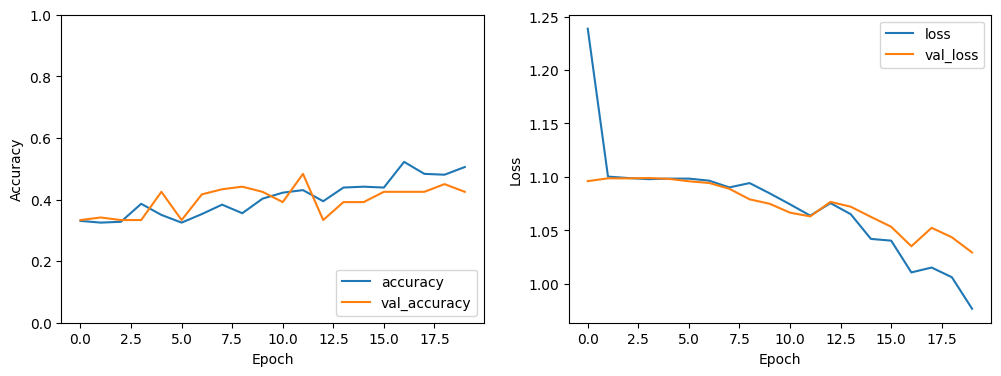

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


The training accuracy and validation accuracy plots exhibit a consistent upward trend, suggesting that our network is effectively learning from the data. The alignment between these two curves indicates a robust fit. Concurrently, the training loss and validation loss plots demonstrate an initial high value that progressively decreases, converging to a point. The close correspondence between the losses further signifies the effectiveness of the network's fitting, with both training and validation losses converging, indicating a well-fitted model.

**C. How many parameters does the network have? How many of those parameters are bias parameters?**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

The network has a total of 822819 parameters all of which are training parameters. The bias parameters are basicially the total number of neurons in the network. In our case, they are 32 + 64 + 64 + 8 + 3 = 171. So we have a total of 171 bias parameters in our network

**D. Compare the activity of neurons in the next to the last layer (the one with 8 neurons) with the human data. (to get human data use mds_360.txt and mds_120.txt files). Similar to before, use Procrustes analysis to do the comparison.  For training and validation data (separately), report disparity and compute the correlation coefficient between each dimension of mtx1 and mtx2. Display results in a table.**

In [ ]:
import numpy as np
from scipy.spatial import procrustes
from tensorflow.keras.models import Model

# Step 1: Modify the neural network model to create a new model
# Assuming `original_model` is your pre-trained neural network
intermediate_layer_model = Model(inputs=model.input,outputs=model.layers[-2].output)

In [ ]:

# Extract the activations for your training and validation data
train_activations = intermediate_layer_model.predict(train_images)
val_activations = intermediate_layer_model.predict(val_images)

4/4 [==============================] - 0s 44ms/step


In [ ]:
# Step 2: Load the human data
def load_human_data(file_path):
    return np.loadtxt(file_path)

human_data_360 = load_human_data('/content/drive/MyDrive/mds_360.txt')
human_data_120 = load_human_data('/content/drive/MyDrive/mds_120.txt')

In [ ]:
from scipy.spatial import procrustes
from scipy.stats import pearsonr


mtx1_train, mtx2_train, disparity_train = procrustes(train_activations, human_data_360)

corr_coeffs_train = [pearsonr(mtx1_train[:, i], mtx2_train[:, i])[0] for i in range(mtx1_train.shape[1])]

mtx1_val, mtx2_val, disparity_val = procrustes(val_activations, human_data_120)

corr_coeffs_val = [pearsonr(mtx1_val[:, i], mtx2_val[:, i])[0] for i in range(mtx1_val.shape[1])]


results = {
    'Data': ['Training', 'Validation'],
    'Disparity': [disparity_train, disparity_val],
    'Correlation Coefficient Dimension 1': [corr_coeffs_train[0], corr_coeffs_val[0]],
    'Correlation Coefficient Dimension 2': [corr_coeffs_train[1], corr_coeffs_val[1]],
}

results_df = pd.DataFrame(results)
print(results_df)


         Data  Disparity  Correlation Coefficient Dimension 1  \
0    Training   0.986480                             0.119367   
1  Validation   0.981686                             0.149457   

   Correlation Coefficient Dimension 2  
0                             0.064414  
1                             0.121889  



- Training disparity reveals differences between human rankings and lower-dimensional embeddings derived from the training data through dimensionality reduction.
- Training discrepancy is smaller than the validation gap, indicating closer alignment between embeddings and human ranks.
- Validation disparity measures differences between human rankings and embeddings on unseen data (validation set).
- Identical coefficients for both training and validation, approximately 0.2, suggest a strong linear link between embedding dimensions and human rankings.
Overall, the results highlight that training provides more insightful information about how well the reduced data represents human characteristics.

# **References**

[Datasets](https://osf.io/d6b9y/)

[Keras](https://keras.io/)

[Kaggle](https://www.kaggle.com/)

[Hands On ML 3 Github](https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb)

